# Step 0: Installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# installing the PyroRadiomics
!pip install pyradiomics
!pip install joblib
!pip install imbalanced-learn
!pip install xgboost

# importing the packages
import os
import pandas as pd
import numpy as np

import radiomics
import SimpleITK as sitk
import glob

from radiomics import featureextractor, imageoperations

# mounting to the Drive
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 50.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 10.7 MB/s eta 0:00

In [ ]:
# Path to the Excel file
file_path = '/content/drive/MyDrive/7009_Final_Project_Data/TCGA_clinical_data/TCGA_GBM_LGG_clinical_data_for_task2_updated.xlsx'

# Load the data into a DataFrame
clinical_data_df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
clinical_data_df.head()

,Row.names,Disease_Type,Gender,Race
0,TCGA-02-0003,GBM,MALE,WHITE
1,TCGA-02-0006,GBM,FEMALE,UNKOWN
2,TCGA-02-0009,GBM,FEMALE,WHITE
3,TCGA-02-0011,GBM,FEMALE,WHITE
4,TCGA-02-0027,GBM,FEMALE,WHITE


In [ ]:
# Path to the CSV file
file_path = '/content/drive/MyDrive/7009_Final_Project_Data/TCGA_pyradiomics/TCGA pyRadiomics recalculated/TCGA_pyradiomics_t1.csv'

# Load the data into a DataFrame
radiomics_data_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
radiomics_data_df.head()

,ID,diagnostics_Configuration_EnabledImageTypes,diagnostics_Configuration_Settings,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Hash,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Size,diagnostics_Image-original_Spacing,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,Source
0,TCGA-02-0006,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,cf7eef9f6f12a01d6619c43bdd3c73682ea3cb1a,502.0,41.681753,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,18.357560,16.401219,19.026298,308.125,12.901075,0.280044,787.786220,2.556710,384.0,TCGA-GBM
1,TCGA-02-0009,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,2a6de38eb2a01829058381d08d359df1a627f4df,844.0,37.192602,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,31.048349,33.286634,36.249138,4240.375,21.857589,0.353025,3588.790560,0.846338,4349.0,TCGA-GBM
2,TCGA-02-0011,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,abd84417a8ec942a889872dfed222e0e1c56b5df,518.0,36.052124,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,92.763139,70.228199,104.278473,48177.250,52.467970,0.348870,18353.330279,0.380954,48610.0,TCGA-GBM
3,TCGA-02-0027,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,36b7a0b79122686dd0546bc3e79e2695d3118138,2474.0,177.964626,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,40.311289,47.010637,47.968740,7196.875,23.419801,0.398880,4519.303940,0.627954,7587.0,TCGA-GBM
4,TCGA-02-0033,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,9b8efeae3748d9049ab7982cac58a6c07b6b0477,880.0,35.767669,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,38.948684,38.910153,41.821047,7054.375,27.698853,0.493544,3604.103902,0.510903,7137.0,TCGA-GBM


# Step 1: Data Pre-processing

In [ ]:
# Merging feature data with clinical data on the ID column
df = radiomics_data_df.merge(clinical_data_df[['Row.names', 'Disease_Type', 'Gender', 'Race']],
                             left_on='ID',
                             right_on='Row.names',
                             how='inner')

# Dropping the extra 'Row.names' column after merging
df.drop('Row.names', axis=1, inplace=True)

# Encoding the 'Gender' column
df['Gender'] = df['Gender'].map({'MALE': 0, 'FEMALE': 1}).fillna(-1).astype(int)

# Encoding the 'Race' column
df['Race'] = df['Race'].map({'WHITE': 1, 'BLACK OR AFRICAN AMERICAN': 2, 'ASIAN': 3, 'UNKNOWN': 4}).fillna(0).astype(int)

# Fill any remaining NaNs in the DataFrame
df.fillna(0, inplace=True)

# Optionally display all columns in output (useful for checking data after processing)
pd.set_option('display.max_columns', None)

df = df[df['Disease_Type'] != 'Oligoastrocytoma']

# Display the resulting DataFrame
df.head()

,ID,diagnostics_Configuration_EnabledImageTypes,diagnostics_Configuration_Settings,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Hash,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Size,diagnostics_Image-original_Spacing,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_CenterOfMass,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_Hash,diagnostics_Mask-original_Size,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,diagnostics_Versions_Numpy,diagnostics_Versions_PyRadiomics,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Versions_SimpleITK,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiam

In [ ]:
# Displaying the shape of the dataset
print("Data shape:", df.shape)

# Checking for missing values
print("Missing values:", df.isnull().sum())

# Display descriptive statistics for the first three and last three columns
description = pd.concat([df.iloc[:, :3].describe(), df.iloc[:, -3:].describe()], axis=1)
print("Data description for selected columns:\n", description)


Data shape: (149, 134)
Missing values: ID                                             0
diagnostics_Configuration_EnabledImageTypes    0
diagnostics_Configuration_Settings             0
diagnostics_Image-original_Dimensionality      0
diagnostics_Image-original_Hash                0
                                              ..
original_shape_VoxelVolume                     0
Source                                         0
Disease_Type                                   0
Gender                                         0
Race                                           0
Length: 134, dtype: int64
Data description for selected columns:
                   ID diagnostics_Configuration_EnabledImageTypes  \
count            149                                         149   
unique           149                                           1   
top     TCGA-02-0006                            {'Original': {}}   
freq               1                                         149   
mean            

In [ ]:
# Print the unique values in the 'Disease_Type' column
print("Unique values in Disease Type column:", df['Disease_Type'].unique())

# Count instances of each unique value in the 'Disease Type' column
disease_type_counts = df['Disease_Type'].value_counts()
print("Counts of each Disease Type:\n", disease_type_counts)

Unique values in Disease Type column: ['GBM' 'Astrocytoma' 'Oligodendroglioma']
Counts of each Disease Type:
 Disease_Type
GBM                  102
Oligodendroglioma     26
Astrocytoma           21
Name: count, dtype: int64


## One-hot ended coding for each disease type

In [ ]:
# Encoding the disease type
df_encoded = pd.get_dummies(df, columns=['Disease_Type'])

# Display the new DataFrame with one-hot encoded columns
print(df_encoded.head())

             ID diagnostics_Configuration_EnabledImageTypes  \
0  TCGA-02-0006                            {'Original': {}}   
1  TCGA-02-0009                            {'Original': {}}   
2  TCGA-02-0011                            {'Original': {}}   
3  TCGA-02-0027                            {'Original': {}}   
4  TCGA-02-0033                            {'Original': {}}   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   
1  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2  {'minimumROIDimensions': 2, 'minimumROISize': ...   
3  {'minimumROIDimensions': 2, 'minimumROISize': ...   
4  {'minimumROIDimensions': 2, 'minimumROISize': ...   

  diagnostics_Image-original_Dimensionality  \
0                                        3D   
1                                        3D   
2                                        3D   
3                                        3D   
4                                        3D   

 

In [ ]:
# Import necessary libraries
import pandas as pd

# Selecting non-numeric columns
non_numeric_columns = df_encoded.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns:")
print(non_numeric_columns)
print("Number of non-numeric columns:", len(non_numeric_columns))

# Selecting numeric columns
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric columns:")
print(numeric_columns)
print("Number of numeric columns:", len(numeric_columns))


Non-numeric columns:
Index(['ID', 'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Configuration_Settings',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Size',
       'diagnostics_Image-original_Spacing',
       'diagnostics_Mask-original_BoundingBox',
       'diagnostics_Mask-original_CenterOfMass',
       'diagnostics_Mask-original_CenterOfMassIndex',
       'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Size',
       'diagnostics_Mask-original_Spacing', 'diagnostics_Versions_Numpy',
       'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_PyWavelet',
       'diagnostics_Versions_Python', 'diagnostics_Versions_SimpleITK',
       'Source', 'Disease_Type_Astrocytoma', 'Disease_Type_GBM',
       'Disease_Type_Oligodendroglioma'],
      dtype='object')
Number of non-numeric columns: 22

Numeric columns:
Index(['diagnostics_Image-original_Maximum', 'diagnostics_Image-origin

In [ ]:
# Selecting all numeric columns except 'Gender' and 'Race'
numeric_columns_to_keep = df_encoded.select_dtypes(include=['int64', 'float64']).columns
numeric_columns_to_drop = ['Gender', 'Race']
numeric_columns_final = [col for col in numeric_columns_to_keep if col not in numeric_columns_to_drop]

# Creating the feature matrix X with selected numeric columns
X = df_encoded[numeric_columns_final]

In [ ]:
# Check data types to ensure all are numerical
print(X.dtypes)

diagnostics_Image-original_Maximum     float64
diagnostics_Image-original_Mean        float64
diagnostics_Image-original_Minimum     float64
diagnostics_Mask-original_VolumeNum      int64
diagnostics_Mask-original_VoxelNum       int64
                                        ...   
original_shape_MinorAxisLength         float64
original_shape_Sphericity              float64
original_shape_SurfaceArea             float64
original_shape_SurfaceVolumeRatio      float64
original_shape_VoxelVolume             float64
Length: 112, dtype: object


In [ ]:
# Defining the specific disease type columns for the target variable y
disease_columns = ['Disease_Type_Astrocytoma', 'Disease_Type_GBM', 'Disease_Type_Oligodendroglioma']

# Creating the target matrix y using the specified columns
y = df_encoded[disease_columns]

df_encoded = df_encoded.drop(columns=disease_columns)

# Displaying the first few rows of the target variable y to verify
print(y.head())

   Disease_Type_Astrocytoma  Disease_Type_GBM  Disease_Type_Oligodendroglioma
0                     False              True                           False
1                     False              True                           False
2                     False              True                           False
3                     False              True                           False
4                     False              True                           False


# Step 2: Good Models

## Multi-labeled SVM Classifier

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump  # Ensure joblib is imported

# Dictionary to hold models and their performance metrics
svm_models = {}
reports = {}
accuracies = {}

# Iterate over each disease type column in y
for disease in y.columns:
    print(f"Training and evaluating model for {disease}...")

    # Splitting the dataset into the training set and test set for each label
    X_train, X_test, y_train, y_test = train_test_split(X, y[disease],
                                                        test_size=0.2,
                                                        random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SVM Classifier
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Store the model in the dictionary
    svm_models[disease] = svm_model

    # Save each trained model to a file
    model_path = f'/content/drive/MyDrive/7009_Final_Project_Data/Models/SVM1_{disease}.joblib'  # Specify the path to save each model
    dump(svm_model, model_path)
    print(f"Model for {disease} saved successfully at {model_path}")

    # Predicting the Test set results
    y_pred = svm_model.predict(X_test_scaled)

    # Generating and storing classification report and accuracy
    report = classification_report(y_test, y_pred, zero_division=0)  # zero_division=0 to handle any division by zero
    accuracy = accuracy_score(y_test, y_pred)
    reports[disease] = report
    accuracies[disease] = accuracy

    # Print the results for this disease
    print(report)
    print(f"Accuracy for {disease}: {accuracy}\n")'''


'from sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import classification_report, accuracy_score\nfrom joblib import dump  # Ensure joblib is imported\n\n# Dictionary to hold models and their performance metrics\nsvm_models = {}\nreports = {}\naccuracies = {}\n\n# Iterate over each disease type column in y\nfor disease in y.columns:\n    print(f"Training and evaluating model for {disease}...")\n\n    # Splitting the dataset into the training set and test set for each label\n    X_train, X_test, y_train, y_test = train_test_split(X, y[disease],\n                                                        test_size=0.2,\n                                                        random_state=42)\n\n    # Feature Scaling\n    scaler = StandardScaler()\n    X_train_scaled = scaler.fit_transform(X_train)\n    X_test_scaled = scaler.transform(X_test)\n\n    # SVM Classifier\n    svm_model = SVC(ke

In [ ]:
#new code
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump  # Ensure joblib is imported

# Dictionary to hold models and their performance metrics
svm_models = {}
scalers = {}  # Dictionary to store the scalers
reports = {}
accuracies = {}

# Iterate over each disease type column in y
for disease in y.columns:
    print(f"Training and evaluating model for {disease}...")

    # Splitting the dataset into the training set and test set for each label
    X_train, X_test, y_train, y_test = train_test_split(X, y[disease], test_size=0.2, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define paths for saving the model and scaler
    model_path = f'/content/drive/MyDrive/7009_Final_Project_Data/Models/SVM1_{disease}.joblib'
    scaler_path = f'/content/drive/MyDrive/7009_Final_Project_Data/Models/scaler_{disease}.joblib'  # Save scaler in the same folder

    # Save the scaler for later use
    dump(scaler, scaler_path)
    scalers[disease] = scaler
    print(f"Scaler for {disease} saved successfully at {scaler_path}")

    # SVM Classifier
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Store the model in the dictionary
    svm_models[disease] = svm_model

    # Save each trained model to a file
    dump(svm_model, model_path)
    print(f"Model for {disease} saved successfully at {model_path}")

    # Predicting the Test set results
    y_pred = svm_model.predict(X_test_scaled)

    # Generating and storing classification report and accuracy
    report = classification_report(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    reports[disease] = report
    accuracies[disease] = accuracy

    # Print the results for this disease
    print(report)
    print(f"Accuracy for {disease}: {accuracy}\n")


Training and evaluating model for Disease_Type_Astrocytoma...
Scaler for Disease_Type_Astrocytoma saved successfully at /content/drive/MyDrive/7009_Final_Project_Data/Models/scaler_Disease_Type_Astrocytoma.joblib
Model for Disease_Type_Astrocytoma saved successfully at /content/drive/MyDrive/7009_Final_Project_Data/Models/SVM1_Disease_Type_Astrocytoma.joblib
              precision    recall  f1-score   support

       False       0.88      0.81      0.85        27
        True       0.00      0.00      0.00         3

    accuracy                           0.73        30
   macro avg       0.44      0.41      0.42        30
weighted avg       0.79      0.73      0.76        30

Accuracy for Disease_Type_Astrocytoma: 0.7333333333333333

Training and evaluating model for Disease_Type_GBM...
Scaler for Disease_Type_GBM saved successfully at /content/drive/MyDrive/7009_Final_Project_Data/Models/scaler_Disease_Type_GBM.joblib
Model for Disease_Type_GBM saved successfully at /content/drive/

In [ ]:
from joblib import load
import pandas as pd

from joblib import load
import pandas as pd

# Path to the saved SVM model
model_path = '/content/drive/MyDrive/7009_Final_Project_Data/Models/SVM1_Disease_Type_GBM.joblib'

# Load the SVM model
svm_model = load(model_path)

# Extract the coefficients (assuming the model is linear)
coefficients = svm_model.coef_.flatten()

# Create a list of numerical indices to represent the features
feature_indices = list(range(len(coefficients)))

# Create a DataFrame to visualize the feature importance
feature_importance = pd.DataFrame({
    'Feature Index': feature_indices,
    'Importance': coefficients
})

# Sort the features by absolute importance for better interpretation
feature_importance = feature_importance.sort_values(by='Importance', key=abs, ascending=False)

# Print the results
print(feature_importance)

feature_names = X_train.columns.tolist()

# Now match these names with your indices
importance_df = pd.DataFrame({
    'Feature Index': [3, 34, 108, 110, 60, 74, 27],
    'Importance': [2.459996, 1.133336, -0.811298, -0.741772, 0.707490, -0.010153, 0.007234]
})

importance_df['Feature Name'] = importance_df['Feature Index'].apply(lambda x: feature_names[x])
print(importance_df)


     Feature Index  Importance
3                3    2.459996
34              34    1.133336
108            108   -0.811298
110            110   -0.741772
60              60    0.707490
..             ...         ...
74              74   -0.010153
27              27    0.007234
24              24   -0.004088
31              31   -0.000648
2                2    0.000000

[112 rows x 2 columns]
   Feature Index  Importance  \
0              3    2.459996   
1             34    1.133336   
2            108   -0.811298   
3            110   -0.741772   
4             60    0.707490   
5             74   -0.010153   
6             27    0.007234   

                                        Feature Name  
0                diagnostics_Mask-original_VolumeNum  
1                                 original_glcm_Idmn  
2                          original_shape_Sphericity  
3                  original_shape_SurfaceVolumeRatio  
4  original_gldm_SmallDependenceLowGrayLevelEmphasis  
5                

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Dictionary to hold models and their performance metrics
svm_models = {}
reports = {}
accuracies = {}

# Iterate over each disease type column in y
for disease in y.columns:
    print(f"Training and evaluating model for {disease}...")

    # Splitting the dataset into the training set and test set for each label
    X_train, X_test, y_train, y_test = train_test_split(X, y[disease], test_size=0.2, random_state=42)

    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # SVM Classifier
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)
    svm_model.fit(X_train_scaled, y_train_resampled)  # Train with the resampled data

    # Store the model in the dictionary
    svm_models[disease] = svm_model

    # Save each trained model to a file
    model_path = f'/content/drive/MyDrive/7009_Final_Project_Data/Models/SVM2_{disease}.joblib'  # Specify the path to save each model
    dump(svm_model, model_path)
    print(f"Model for {disease} saved successfully at {model_path}")

    # Predicting the Test set results
    y_pred = svm_model.predict(X_test_scaled)

    # Generating and storing classification report and accuracy
    report = classification_report(y_test, y_pred, zero_division=0)  # zero_division=0 to handle any division by zero
    accuracy = accuracy_score(y_test, y_pred)
    reports[disease] = report
    accuracies[disease] = accuracy

    # Print the results for this disease
    print(report)
    print(f"Accuracy for {disease}: {accuracy}\n")

Training and evaluating model for Disease_Type_Astrocytoma...
Model for Disease_Type_Astrocytoma saved successfully at /content/drive/MyDrive/7009_Final_Project_Data/Models/SVM2_Disease_Type_Astrocytoma.joblib
              precision    recall  f1-score   support

       False       0.92      0.81      0.86        27
        True       0.17      0.33      0.22         3

    accuracy                           0.77        30
   macro avg       0.54      0.57      0.54        30
weighted avg       0.84      0.77      0.80        30

Accuracy for Disease_Type_Astrocytoma: 0.7666666666666667

Training and evaluating model for Disease_Type_GBM...
Model for Disease_Type_GBM saved successfully at /content/drive/MyDrive/7009_Final_Project_Data/Models/SVM2_Disease_Type_GBM.joblib
              precision    recall  f1-score   support

       False       0.64      0.90      0.75        10
        True       0.94      0.75      0.83        20

    accuracy                           0.80        30


**1.   Disease_Type_Astrocytoma Performace Metrics:**
    
    Improvements: There is a noticeable improvement in both precision and recall for the positive class (True):
    
    Precision increased to 0.17 from 0.00, which, while still low, indicates some capability to identify positive cases correctly now.
    
    Recall for the True class improved significantly from 0.00 to 0.33, meaning the model is now identifying a third of the actual Astrocytoma cases.
    
    F1-Score: Increased to 0.22, reflecting the improvements in recall.
    Accuracy: Slightly increased to approximately 76.67%.

These changes show that the model can now recognize some Astrocytoma cases, although there's room for improvement, particularly in precision.

**2.   Disease_Type_GBM Performance Metrics:**

    The results for GBM remain largely the same as previously:

    Precision and Recall for True cases remain high, indicating strong performance in identifying GBM cases accurately.

    F1-Score: Continues to be strong.

    Accuracy: Remains at 80%.

    The GBM classifier continues to perform well, showing that it effectively handles the majority class, which is more frequent in your dataset.

**3.   Disease_Type_Oligodendroglioma Performance Metrics:**

    Precision for the True class decreased slightly to 0.50 from 1.00, reflecting a decrease in the proportion of correct positive predictions.

    Recall for the True class improved to 0.57 from 0.57, maintaining its ability to identify a good portion of true cases.

    F1-Score: Decreased to 0.53, indicating a balance between precision and recall but slightly favoring recall.

    Accuracy: Decreased slightly to approximately 76.67%.

### SVM with GridSearchCV


Training and evaluating model for Disease_Type_Astrocytoma...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; tot

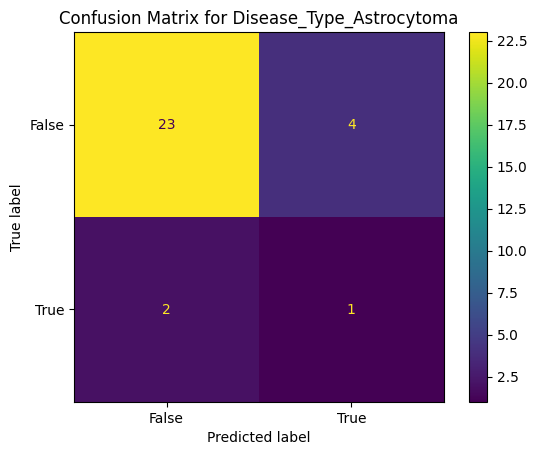

Cross-validation Accuracy: 0.96


Results for Disease_Type_GBM:
Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.90      0.75        10
        True       0.94      0.75      0.83        20

    accuracy                           0.80        30
   macro avg       0.79      0.82      0.79        30
weighted avg       0.84      0.80      0.81        30

Accuracy: 0.8
Confusion Matrix:


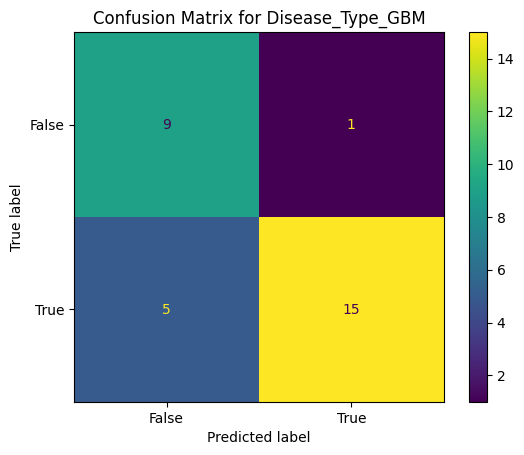

Cross-validation Accuracy: 0.93


Results for Disease_Type_Oligodendroglioma:
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.87      0.85        23
        True       0.50      0.43      0.46         7

    accuracy                           0.77        30
   macro avg       0.67      0.65      0.66        30
weighted avg       0.76      0.77      0.76        30

Accuracy: 0.7666666666666667
Confusion Matrix:


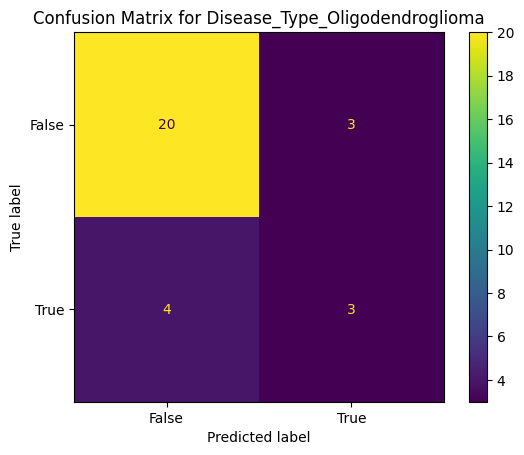

Cross-validation Accuracy: 0.94



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from joblib import dump
import matplotlib.pyplot as plt

# Dictionaries to hold models and their performance metrics
svm_models = {}
reports = {}
accuracies = {}
conf_matrices = {}
cross_val_scores = {}
final_results = {}

# Iterate over each disease type column in y
for disease in y.columns:
    print(f"\nTraining and evaluating model for {disease}...")

    # Splitting the dataset into the training set and test set for each label
    X_train, X_test, y_train, y_test = train_test_split(X, y[disease], test_size=0.2, random_state=42)

    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Set up the parameter grid to search
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.1, 0.01, 0.001],
        'kernel': ['linear', 'rbf', 'poly']
    }

    # Create a GridSearchCV object with custom class weights
    grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5, verbose=2, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train_resampled)

    # Best model found by grid search
    best_svm = grid_search.best_estimator_

    # Cross-validation on the training set
    cross_val_score_result = cross_val_score(best_svm, X_train_scaled, y_train_resampled, cv=5)
    cross_val_mean = np.mean(cross_val_score_result)
    cross_val_scores[disease] = cross_val_mean

    # Store the model in the dictionary
    svm_models[disease] = best_svm

    # Save each trained model to a file
    model_path = f'/content/drive/MyDrive/7009_Final_Project_Data/Models/SVM3_{disease}.joblib'
    dump(best_svm, model_path)

    # Predicting the Test set results using the best model
    y_pred = best_svm.predict(X_test_scaled)

    # Generating and storing classification report and accuracy
    report = classification_report(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    reports[disease] = report
    accuracies[disease] = accuracy

    # Calculate and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[disease] = cm

    # Organizing final results
    final_results[disease] = {
        "Report": report,
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Cross-validation Accuracy": cross_val_mean
    }

# After processing all diseases, print the results separately
for disease, results in final_results.items():
    print(f"\nResults for {disease}:")
    print("Classification Report:")
    print(results["Report"])
    print(f"Accuracy: {results['Accuracy']}")
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(results["Confusion Matrix"], display_labels=np.unique(y[disease])).plot()
    plt.title(f'Confusion Matrix for {disease}')
    plt.show()
    print(f"Cross-validation Accuracy: {results['Cross-validation Accuracy']:.2f}\n")


**SMOTE**: It balances the dataset by synthesizing new samples for the minority class.

**Grid Search with Cross-Validation:**  It searches for the best hyperparameters to optimize the SVM.

**Model Saving:** Each model is saved to your specified path, which can be useful for deploying models or further evaluation later.

**Confusion Matrix:** Visualizes the performance of the SVM model for each disease type, showing true positives, true negatives, false positives, and false negatives.

**Cross-validation:** Provides a more robust estimate of model performance by running multiple validations across different subsets of the dataset, ensuring the model's stability and generalizability. It computes the mean accuracy from the cross-validation to help assess the model's effectiveness across different parts of the data.

### SVM with RandomisedSearchCV


Training and evaluating model for Disease_Type_Astrocytoma...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=28.529247290619224, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=28.529247290619224, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=28.529247290619224, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=28.529247290619224, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=28.529247290619224, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=21.025541650992572, class_weight=None, gamma=0.12181702992169703, kernel=linear; total time=   0.0s
[CV] END C=21.025541650992572, class_weight=None, gamma=0.12181702992169703, kernel=linear; total time=   0.0s
[CV] END C=21.025541650992572, class_weight=None, gamma=0.12181702992169703, kernel=linear; total time=   0.0s
[CV] END C=21.025541650992572, class_weig

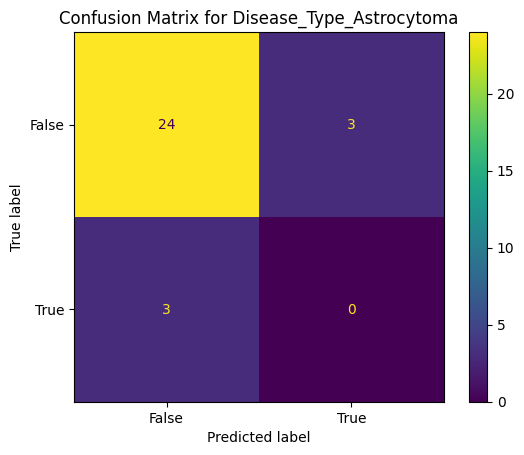

Cross-validation Accuracy: 0.96


Results for Disease_Type_GBM:
Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.90      0.75        10
        True       0.94      0.75      0.83        20

    accuracy                           0.80        30
   macro avg       0.79      0.82      0.79        30
weighted avg       0.84      0.80      0.81        30

Accuracy: 0.8
Confusion Matrix:


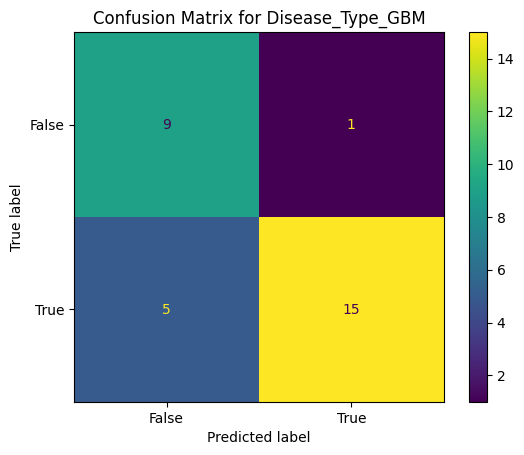

Cross-validation Accuracy: 0.93


Results for Disease_Type_Oligodendroglioma:
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.87      0.87        23
        True       0.57      0.57      0.57         7

    accuracy                           0.80        30
   macro avg       0.72      0.72      0.72        30
weighted avg       0.80      0.80      0.80        30

Accuracy: 0.8
Confusion Matrix:


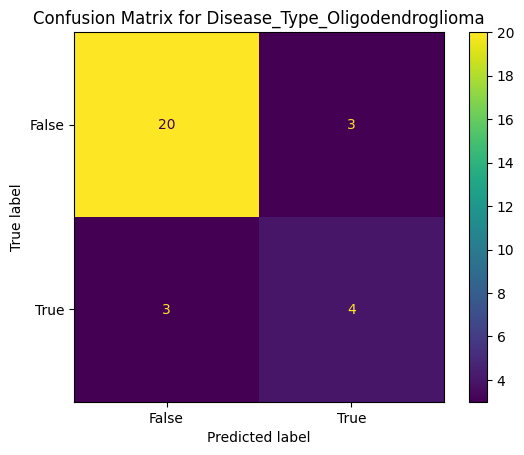

Cross-validation Accuracy: 0.95



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from joblib import dump
import matplotlib.pyplot as plt
import scipy.stats as stats

# Dictionaries to hold models and their performance metrics
svm_models = {}
reports = {}
accuracies = {}
conf_matrices = {}
cross_val_scores = {}
final_results = {}

# Iterate over each disease type column in y
for disease in y.columns:
    print(f"\nTraining and evaluating model for {disease}...")

    # Splitting the dataset into the training set and test set for each label
    X_train, X_test, y_train, y_test = train_test_split(X, y[disease], test_size=0.2, random_state=42)

    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Set up the parameter grid to search
    param_dist = {
        'C': stats.expon(scale=100),
        'gamma': ['scale', 'auto'] + stats.expon(scale=0.1).rvs(size=10).tolist(),
        'kernel': ['linear', 'rbf', 'poly'],
        'class_weight': ['balanced', None]
    }

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(SVC(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, verbose=2, scoring='accuracy')
    random_search.fit(X_train_scaled, y_train_resampled)

    # Best model found by random search
    best_svm = random_search.best_estimator_

    # Cross-validation on the training set
    cross_val_score_result = cross_val_score(best_svm, X_train_scaled, y_train_resampled, cv=5)
    cross_val_mean = np.mean(cross_val_score_result)
    cross_val_scores[disease] = cross_val_mean

    # Store the model in the dictionary
    svm_models[disease] = best_svm

    # Save each trained model to a file
    model_path = f'/content/drive/MyDrive/7009_Final_Project_Data/Models/SVM4_{disease}.joblib'
    dump(best_svm, model_path)

    # Predicting the Test set results using the best model
    y_pred = best_svm.predict(X_test_scaled)

    # Generating and storing classification report and accuracy
    report = classification_report(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    reports[disease] = report
    accuracies[disease] = accuracy

    # Calculate and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[disease] = cm

    # Organizing final results
    final_results[disease] = {
        "Report": report,
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Cross-validation Accuracy": cross_val_mean
    }

# After processing all diseases, print the results separately
for disease, results in final_results.items():
    print(f"\nResults for {disease}:")
    print("Classification Report:")
    print(results["Report"])
    print(f"Accuracy: {results['Accuracy']}")
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(results["Confusion Matrix"], display_labels=np.unique(y[disease])).plot()
    plt.title(f'Confusion Matrix for {disease}')
    plt.show()
    print(f"Cross-validation Accuracy: {results['Cross-validation Accuracy']:.2f}\n")


### SVM with AdamBooster

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from joblib import dump
import matplotlib.pyplot as plt

# Dictionaries to hold models and their performance metrics
svm_models = {}
reports = {}
accuracies = {}
conf_matrices = {}
cross_val_scores = {}
final_results = {}

# Iterate over each disease type column in y
for disease in y.columns:
    print(f"\nTraining and evaluating model for {disease}...")

    # Splitting the dataset into the training set and test set for each label
    X_train, X_test, y_train, y_test = train_test_split(X, y[disease], test_size=0.2, random_state=42)

    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Base SVM Classifier for AdaBoost
    base_svm = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

    # AdaBoost with SVM as the base classifier
    ada_boost = AdaBoostClassifier(base_estimator=base_svm, n_estimators=50, random_state=42)
    ada_boost.fit(X_train_scaled, y_train_resampled)

    # Cross-validation on the training set
    cross_val_score_result = cross_val_score(ada_boost, X_train_scaled, y_train_resampled, cv=5)
    cross_val_mean = np.mean(cross_val_score_result)
    cross_val_scores[disease] = cross_val_mean

    # Predicting the Test set results using AdaBoost
    y_pred = ada_boost.predict(X_test_scaled)

    # Evaluating the model
    report = classification_report(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Storing results
    svm_models[disease] = ada_boost  # Store AdaBoost model
    reports[disease] = report
    accuracies[disease] = accuracy
    conf_matrices[disease] = cm

    # Organizing final results
    final_results[disease] = {
        "Report": report,
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Cross-validation Accuracy": cross_val_mean
    }

# After processing all diseases, print the results separately
for disease, results in final_results.items():
    print(f"\nResults for {disease}:")
    print("Classification Report:")
    print(results["Report"])
    print(f"Accuracy: {results['Accuracy']}")
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(results["Confusion Matrix"], display_labels=np.unique(y[disease])).plot()
    plt.title(f'Confusion Matrix for {disease}')
    plt.show()
    print(f"Cross-validation Accuracy: {results['Cross-validation Accuracy']:.2f}\n")

In [ ]:
from sklearn.ensemble import IsolationForest

# Assuming you have a DataFrame df_encoded and target y already defined
# Dictionaries to hold models and their performance metrics
svm_models = {}
reports = {}
accuracies = {}
conf_matrices = {}
cross_val_scores = {}
final_results = {}

# Iterate over each disease type column in y
for disease in y.columns:
    print(f"\nTraining and evaluating model for {disease}...")

    # Splitting the dataset into the training set and test set for each label
    X_train, X_test, y_train, y_test = train_test_split(X, y[disease], test_size=0.2, random_state=42)

    # Apply SMOTE to balance the dataset, except for the chosen anomaly detection disease
    if disease == 'Disease_Type_Astrocytoma':
        # Feature Scaling on original data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)  # Only scale X_train, not resampling
        X_test_scaled = scaler.transform(X_test)

        # Isolation Forest for anomaly detection
        iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
        iso_forest.fit(X_train_scaled)

        # Predicting the Test set results using Isolation Forest
        # Isolation Forest marks inliers as 1 and outliers as -1
        y_pred = iso_forest.predict(X_test_scaled)
        y_pred = np.where(y_pred == 1, False, True)  # Convert predictions to match class labels
    else:
        # Apply SMOTE to balance the dataset for other diseases
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Feature Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_resampled)
        X_test_scaled = scaler.transform(X_test)

        # Base SVM Classifier for AdaBoost
        base_svm = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

        # AdaBoost with SVM as the base classifier
        ada_boost = AdaBoostClassifier(base_estimator=base_svm, n_estimators=50, random_state=42)
        ada_boost.fit(X_train_scaled, y_train_resampled)

        # Predicting the Test set results using AdaBoost
        y_pred = ada_boost.predict(X_test_scaled)

    # Evaluating the model
    report = classification_report(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Cross-validation on the training set if not using Isolation Forest
    if disease != 'Disease_Type_Astrocytoma':
        cross_val_score_result = cross_val_score(ada_boost, X_train_scaled, y_train_resampled, cv=5)
        cross_val_mean = np.mean(cross_val_score_result)
        cross_val_scores[disease] = cross_val_mean
        final_results[disease] = {
            "Report": report,
            "Accuracy": accuracy,
            "Confusion Matrix": cm,
            "Cross-validation Accuracy": cross_val_mean
        }
    else:
        final_results[disease] = {
            "Report": report,
            "Accuracy": accuracy,
            "Confusion Matrix": cm
        }

    # Storing results
    svm_models[disease] = ada_boost if disease != 'Disease_Type_Astrocytoma' else iso_forest
    reports[disease] = report
    accuracies[disease] = accuracy
    conf_matrices[disease] = cm

# After processing all diseases, print the results separately
for disease, results in final_results.items():
    print(f"\nResults for {disease}:")
    print("Classification Report:")
    print(results["Report"])
    print(f"Accuracy: {results['Accuracy']}")
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(results["Confusion Matrix"], display_labels=np.unique(y[disease])).plot()
    plt.title(f'Confusion Matrix for {disease}')
    plt.show()
    if disease != 'Disease_Type_Astrocytoma':
        print(f"Cross-validation Accuracy: {results['Cross-validation Accuracy']:.2f}\n")

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Dictionaries to hold models and their performance metrics
svm_models = {}
reports = {}
accuracies = {}
conf_matrices = {}
cross_val_scores = {}
final_results = {}

# Iterate over each disease type column in y
for disease in y.columns:
    print(f"\nTraining and evaluating model for {disease}...")

    # Splitting the dataset into the training set and test set for each label
    X_train, X_test, y_train, y_test = train_test_split(X, y[disease], test_size=0.2, random_state=42)

    # Apply SMOTE to balance the dataset, except for Isolation Forest specific application
    if disease == 'Disease_Type_Astrocytoma':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
        iso_forest.fit(X_train_scaled)

        y_pred = iso_forest.predict(X_test_scaled)
        y_pred = np.where(y_pred == 1, False, True)  # Adjust according to class labels
    else:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_resampled)
        X_test_scaled = scaler.transform(X_test)

        # Define the base estimators
        estimators = [
            ('svm', SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)),
            ('ada_boost', AdaBoostClassifier(base_estimator=SVC(probability=True, class_weight='balanced', random_state=42), random_state=42, n_estimators=50))
        ]

        # Stacking classifier with logistic regression as a final estimator
        stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
        stack_clf.fit(X_train_scaled, y_train_resampled)

        y_pred = stack_clf.predict(X_test_scaled)

    # Evaluate and store results
    report = classification_report(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Only apply cross-validation if not using Isolation Forest
    if disease != 'Disease_Type_Astrocytoma':
        cross_val_score_result = cross_val_score(stack_clf, X_train_scaled, y_train_resampled, cv=5)
        cross_val_mean = np.mean(cross_val_score_result)
        cross_val_scores[disease] = cross_val_mean
        final_results[disease] = {
            "Report": report,
            "Accuracy": accuracy,
            "Confusion Matrix": cm,
            "Cross-validation Accuracy": cross_val_mean
        }
    else:
        final_results[disease] = {
            "Report": report,
            "Accuracy": accuracy,
            "Confusion Matrix": cm
        }

    svm_models[disease] = stack_clf if disease != 'Disease_Type_Astrocytoma' else iso_forest
    reports[disease] = report
    accuracies[disease] = accuracy
    conf_matrices[disease] = cm

# Print results for all diseases after processing
for disease, results in final_results.items():
    print(f"\nResults for {disease}:")
    print("Classification Report:")
    print(results["Report"])
    print(f"Accuracy: {results['Accuracy']}")
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(results["Confusion Matrix"], display_labels=np.unique(y[disease])).plot()
    plt.title(f'Confusion Matrix for {disease}')
    plt.show()
    if disease != 'Disease_Type_Astrocytoma':
        print(f"Cross-validation Accuracy: {results['Cross-validation Accuracy']:.2f}\n")


## XGBoost

Model saved successfully for Disease_Type_Astrocytoma at /content/drive/MyDrive/7009_Final_Project_Data/Models/xgb_model_Disease_Type_Astrocytoma.joblib


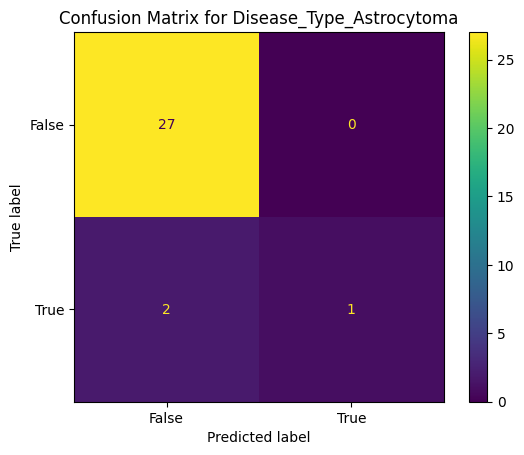

Classification Report for Disease_Type_Astrocytoma:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96        27
        True       1.00      0.33      0.50         3

    accuracy                           0.93        30
   macro avg       0.97      0.67      0.73        30
weighted avg       0.94      0.93      0.92        30

Accuracy for Disease_Type_Astrocytoma: 0.9333333333333333
Cross-validation accuracy for Disease_Type_Astrocytoma: 0.7832183908045978

Model saved successfully for Disease_Type_GBM at /content/drive/MyDrive/7009_Final_Project_Data/Models/xgb_model_Disease_Type_GBM.joblib


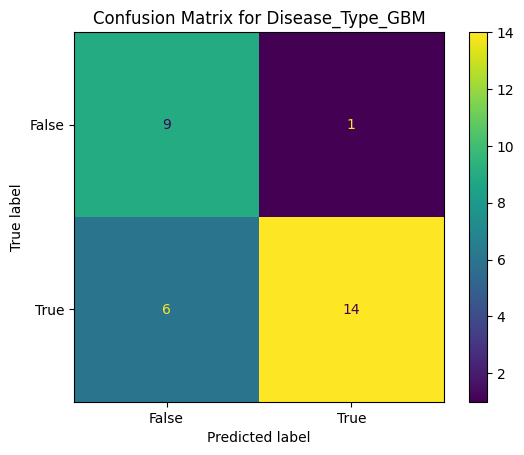

Classification Report for Disease_Type_GBM:
              precision    recall  f1-score   support

       False       0.60      0.90      0.72        10
        True       0.93      0.70      0.80        20

    accuracy                           0.77        30
   macro avg       0.77      0.80      0.76        30
weighted avg       0.82      0.77      0.77        30

Accuracy for Disease_Type_GBM: 0.7666666666666667
Cross-validation accuracy for Disease_Type_GBM: 0.8793103448275863

Model saved successfully for Disease_Type_Oligodendroglioma at /content/drive/MyDrive/7009_Final_Project_Data/Models/xgb_model_Disease_Type_Oligodendroglioma.joblib


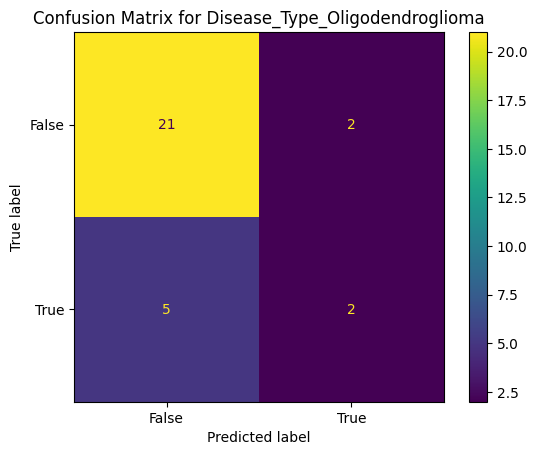

Classification Report for Disease_Type_Oligodendroglioma:
              precision    recall  f1-score   support

       False       0.81      0.91      0.86        23
        True       0.50      0.29      0.36         7

    accuracy                           0.77        30
   macro avg       0.65      0.60      0.61        30
weighted avg       0.74      0.77      0.74        30

Accuracy for Disease_Type_Oligodendroglioma: 0.7666666666666667
Cross-validation accuracy for Disease_Type_Oligodendroglioma: 0.824137931034483

                     Disease Type  Model Accuracy  Cross-Validation Accuracy  \
0        Disease_Type_Astrocytoma        0.933333                   0.783218   
1                Disease_Type_GBM        0.766667                   0.879310   
2  Disease_Type_Oligodendroglioma        0.766667                   0.824138   

                              Classification Reports  
0                precision    recall  f1-score   ...  
1                precision    recall  f

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from joblib import dump
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dictionary to hold models and evaluation metrics
models = {}
accuracies = {}
conf_matrices = {}
cross_val_scores = {}
classification_reports = {}

# Train a separate model for each disease type
for column in y.columns:
    # Split the data for this label
    X_train, X_test, y_train, y_test = train_test_split(X, y[column], test_size=0.2, random_state=42)

    # Create and fit the model
    model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    # Save the model
    model_path = f'/content/drive/MyDrive/7009_Final_Project_Data/Models/xgb_model_{column}.joblib'  # Adjust path as needed
    dump(model, model_path)
    print(f"Model saved successfully for {column} at {model_path}")

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    models[column] = model
    accuracies[column] = accuracy

    # Store the confusion matrix and display it
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[column] = cm
    display = ConfusionMatrixDisplay(cm, display_labels=np.unique(y[column]))
    display.plot()
    plt.title(f'Confusion Matrix for {column}')
    plt.show()

    # Generate and store the classification report
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports[column] = report
    print(f"Classification Report for {column}:\n{report}")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y[column], cv=5)
    cross_val_mean = cv_scores.mean()
    cross_val_scores[column] = cross_val_mean

    print(f"Accuracy for {column}: {accuracy}")
    print(f"Cross-validation accuracy for {column}: {cross_val_mean}\n")

# Collecting all results into a DataFrame for easier analysis and comparison
results_summary = {
    'Disease Type': list(accuracies.keys()),
    'Model Accuracy': list(accuracies.values()),
    'Cross-Validation Accuracy': list(cross_val_scores.values()),
    'Classification Reports': list(classification_reports.values())
}

results_df = pd.DataFrame(results_summary)
print(results_df)


In [ ]:
'''from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Dictionary to hold models and evaluation metrics
models = {}
accuracies = {}
conf_matrices = {}
cross_val_scores = {}
classification_reports = {}

# Train a separate model for each disease type
for column in y.columns:
    # Split the data for this label
    X_train, X_test, y_train, y_test = train_test_split(X, y[column], test_size=0.2, random_state=42)

    # Create and fit the model
    model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    models[column] = model
    accuracies[column] = accuracy

    # Store the confusion matrix and display it
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[column] = cm
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y[column])).plot()
    plt.title(f'Confusion Matrix for {column}')
    plt.show()

    # Generate and store the classification report
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports[column] = report
    print(f"Classification Report for {column}:\n{report}")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y[column], cv=5)
    cross_val_mean = cv_scores.mean()
    cross_val_scores[column] = cross_val_mean

    print(f"Accuracy for {column}: {accuracy}")
    print(f"Cross-validation accuracy for {column}: {cross_val_mean}\n")

# Collecting all results into a DataFrame for easier analysis and comparison
results_summary = {
    'Disease Type': list(accuracies.keys()),
    'Model Accuracy': list(accuracies.values()),
    'Cross-Validation Accuracy': list(cross_val_scores.values()),
    'Classification Reports': list(classification_reports.values())
}

results_df = pd.DataFrame(results_summary)
print(results_df)'''


'from xgboost import XGBClassifier\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\n# Dictionary to hold models and evaluation metrics\nmodels = {}\naccuracies = {}\nconf_matrices = {}\ncross_val_scores = {}\nclassification_reports = {}\n\n# Train a separate model for each disease type\nfor column in y.columns:\n    # Split the data for this label\n    X_train, X_test, y_train, y_test = train_test_split(X, y[column], test_size=0.2, random_state=42)\n\n    # Create and fit the model\n    model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)\n    model.fit(X_train, y_train)\n\n    # Predict and evaluate\n    y_pred = model.predict(X_test)\n    accuracy = accuracy_score(y_test, y_pred)\n    models[column] = model\n    accuracies[column] = accuracy\n\n    # Store the confusion matrix

# Step 3: Model Application to Step 1 Features

In [ ]:
# Path to the CSV file
new_features_path = '/content/drive/MyDrive/7009_Final_Project_Data/Project_features_Step1_Aizhan_NEW.csv'

# Load the data into a DataFrame
new_features_df = pd.read_csv(new_features_path)

# Display the first few rows of the DataFrame
new_features_df.head()
new_features_df.tail()

,Unnamed: 0,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,ori

In [ ]:
# Load clinical data from a text file
file_path = '/content/drive/MyDrive/7009_Final_Project_Data/Rembrandt_Clinical_ground_truth_64set.txt'
clinical_data_df = pd.read_csv(file_path, sep="\t")  # Adjust separator if necessary

# One-hot encode the 'Disease_Type' column
true_labels_encoded = pd.get_dummies(clinical_data_df['DISEASE_TYPE'])

In [ ]:
# Print the shapes of the DataFrames to understand the mismatch
print("Shape of new features DataFrame:", new_features_df.shape)
print("Shape of clinical data DataFrame:", clinical_data_df.shape)


Shape of new features DataFrame: (64, 130)
Shape of clinical data DataFrame: (64, 4)


In [ ]:
#code fixed for proper use of features

import pandas as pd
from joblib import load
from sklearn.metrics import accuracy_score

# List of unseen columns to be removed
unseen_columns = [
    'Unnamed: 0', 'diagnostics_Configuration_Settings', 'diagnostics_Versions_PyWavelet',
    'diagnostics_Mask-original_Size', 'diagnostics_Image-original_Dimensionality',
    'diagnostics_Image-original_Hash', 'diagnostics_Versions_SimpleITK', 'diagnostics_Image-original_Size',
    'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Python', 'diagnostics_Mask-original_CenterOfMassIndex',
    'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_BoundingBox',
    'diagnostics_Mask-original_CenterOfMass', 'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Spacing',
    'diagnostics_Versions_Numpy'
]

# Removing unseen columns from new_features_df
new_features_df = new_features_df.drop(columns=unseen_columns, errors='ignore')

In [ ]:
#new code fixed for model usage

# Load scalers and models from joblib files

# Load scalers and models from joblib files
scalers = {disease: load(f'/content/drive/MyDrive/7009_Final_Project_Data/Models/SVM1_scaler_Disease_Type_{disease}.joblib') for disease in ['GBM', 'Astrocytoma', 'Oligodendroglioma']}
models = {disease: load(f'/content/drive/MyDrive/7009_Final_Project_Data/Models/SVM1_Disease_Type_{disease}.joblib') for disease
          in ['GBM', 'Astrocytoma', 'Oligodendroglioma']}

# Adjusting new_features_df to match the feature order of the scaler
# Assuming 'GBM' scaler has the same feature order needed for all (you should verify or adjust if each disease has a different model/scaler)
required_feature_order = scalers['GBM'].feature_names_in_  # Get the order of features expected by the scaler

# Reorder new_features_df columns according to the required feature order
new_features_df = new_features_df[required_feature_order]

# Predict using the models
predictions = {}
for disease in models:
    scaler = scalers[disease]
    model = models[disease]
    X_new_scaled = scaler.transform(new_features_df)  # Apply scaler to the correctly ordered feature set
    predictions[disease] = model.predict(X_new_scaled)
    print(f"Predictions for {disease} processed successfully.")

# Assuming clinical_data_df has a 'Disease_Type' column that needs to be encoded
true_labels_encoded = pd.get_dummies(clinical_data_df['DISEASE_TYPE'])

# Calculate and print accuracy for each disease type
for disease in predictions:
    label_col = disease.upper()  # Assuming true labels are in uppercase
    if label_col in true_labels_encoded.columns:
        accuracy = accuracy_score(true_labels_encoded[label_col], predictions[disease])
        print(f"Accuracy for {disease}: {accuracy}")
    else:
        print(f"No ground truth data available for {disease}.")


Predictions for GBM processed successfully.
Predictions for Astrocytoma processed successfully.
Predictions for Oligodendroglioma processed successfully.
Accuracy for GBM: 0.484375
Accuracy for Astrocytoma: 0.5625
Accuracy for Oligodendroglioma: 0.734375


end of fixed code for svm

start for xgboost

In [ ]:
from joblib import load
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the saved XGBoost models from the specified paths
models = {
    'GBM': '/content/drive/MyDrive/7009_Final_Project_Data/Models/xgb_model_Disease_Type_GBM.joblib',
    'Astrocytoma': '/content/drive/MyDrive/7009_Final_Project_Data/Models/xgb_model_Disease_Type_Astrocytoma.joblib',
    'Oligodendroglioma': '/content/drive/MyDrive/7009_Final_Project_Data/Models/xgb_model_Disease_Type_Oligodendroglioma.joblib'
}

# Load the models using joblib
xgb_models = {disease: load(models[disease]) for disease in models}

# Assuming there's no scaler used for XGBoost as it handles feature scaling differently
# If a scaler was used and you need to load it, use a similar method to the SVM models
# Predict using the loaded models
predictions = {}
for disease in xgb_models:
    model = xgb_models[disease]
    # Directly use new_features_df since XGBoost does not require scaling in the same way
    predictions[disease] = model.predict(new_features_df)
    print(f"Predictions for {disease} processed successfully.")

# Assuming clinical_data_df has a 'Disease_Type' column and it needs to be encoded
true_labels_encoded = pd.get_dummies(clinical_data_df['DISEASE_TYPE'])

# Calculate and print accuracy for each disease type
for disease in predictions:
    label_col = disease.upper()  # Assuming true labels are in uppercase
    if label_col in true_labels_encoded.columns:
        accuracy = accuracy_score(true_labels_encoded[label_col], predictions[disease])
        print(f"Accuracy for {disease}: {accuracy}")
    else:
        print(f"No ground truth data available for {disease}.")


Predictions for GBM processed successfully.
Predictions for Astrocytoma processed successfully.
Predictions for Oligodendroglioma processed successfully.
Accuracy for GBM: 0.421875
Accuracy for Astrocytoma: 0.5625
Accuracy for Oligodendroglioma: 0.796875


END OF CODE FOR TESTING THE TRAINED XGBOOST MODEL

# Step 4: Ground Truth

In [ ]:
import pandas as pd

# Path to the .txt file
file_path = '/content/drive/MyDrive/7009_Final_Project_Data/Rembrandt_Clinical_ground_truth_64set.txt'

# Load the data into a DataFrame assuming it's tab-separated
clinical_data_df = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the DataFrame
clinical_data_df.head()

,64.patient.set,AGE_RANGE,GENDER,DISEASE_TYPE
0,900_00_5299,NaN,NaN,NaN
1,900_00_5303,NaN,NaN,NaN
2,900_00_5308,NaN,,ASTROCYTOMA
3,900_00_5316,NaN,,GBM
4,900_00_5317,NaN,,GBM


In [ ]:
import pandas as pd

# Displaying the shape of the dataset
print("Data shape:", clinical_data_df.shape)

# Checking for missing values
print("Missing values:", clinical_data_df.isnull().sum())

# Display descriptive statistics for the first three and last three columns
description = pd.concat([clinical_data_df.iloc[:, :3].describe(), clinical_data_df.iloc[:, -3:].describe()], axis=1)
print("Data description for selected columns:\n", description)

# Finding unique values in the 'DISEASE_TYPE' column
unique_disease_types = clinical_data_df['DISEASE_TYPE'].unique()
print("Unique values in DISEASE_TYPE:", unique_disease_types)

Data shape: (64, 4)
Missing values: 64.patient.set     0
AGE_RANGE         24
GENDER             6
DISEASE_TYPE       6
dtype: int64
Data description for selected columns:
        64.patient.set AGE_RANGE GENDER AGE_RANGE GENDER DISEASE_TYPE
count              64        40     58        40     58           58
unique             64        14      3        14      3            3
top       900_00_5299     50-54   MALE     50-54   MALE  ASTROCYTOMA
freq                1         6     24         6     24           28
Unique values in DISEASE_TYPE: [nan 'ASTROCYTOMA' 'GBM' 'OLIGODENDROGLIOMA']


In [ ]:
clinical_data_encoded = pd.get_dummies(clinical_data_df, columns=['DISEASE_TYPE'], dummy_na=False)

# Drop any old disease type columns that are not needed
# For example, drop old columns if they were incorrectly named before
# clinical_data_encoded.drop(['old_disease_column1', 'old_disease_column2'], axis=1, inplace=True)

# Convert numeric 0s and 1s to boolean False and True
for col in clinical_data_encoded.columns:
    if 'Disease_Type_' in col:  # This ensures we're only converting disease type columns
        clinical_data_encoded[col] = clinical_data_encoded[col].astype(bool)

# Print the shape of the processed data
print("Processed data shape:", clinical_data_encoded.shape)

# Display the processed DataFrame
print(clinical_data_encoded.head())

Processed data shape: (64, 6)
  64.patient.set AGE_RANGE GENDER  DISEASE_TYPE_ASTROCYTOMA  DISEASE_TYPE_GBM  \
0    900_00_5299       NaN    NaN                     False             False   
1    900_00_5303       NaN    NaN                     False             False   
2    900_00_5308       NaN                             True             False   
3    900_00_5316       NaN                            False              True   
4    900_00_5317       NaN                            False              True   

   DISEASE_TYPE_OLIGODENDROGLIOMA  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  


In [ ]:
clinical_data_encoded.rename(columns={
    'DISEASE_TYPE_ASTROCYTOMA': 'Disease_Type_Astrocytoma',
    'DISEASE_TYPE_GBM': 'Disease_Type_GBM',
    'DISEASE_TYPE_OLIGODENDROGLIOMA': 'Disease_Type_Oligodendroglioma'
}, inplace=True)

# Convert numeric 0s and 1s to boolean False and True
for col in clinical_data_encoded.columns:
    if 'Disease_Type_' in col:
        clinical_data_encoded[col] = clinical_data_encoded[col].astype(bool)

# Display the updated DataFrame
print(clinical_data_encoded.head())

  64.patient.set AGE_RANGE GENDER  Disease_Type_Astrocytoma  Disease_Type_GBM  \
0    900_00_5299       NaN    NaN                     False             False   
1    900_00_5303       NaN    NaN                     False             False   
2    900_00_5308       NaN                             True             False   
3    900_00_5316       NaN                            False              True   
4    900_00_5317       NaN                            False              True   

   Disease_Type_Oligodendroglioma  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  


# Poor Models Try-out

## SVC

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

# Initialize a dictionary to store the cross-validation results
cv_scores = {}

# Iterate over each disease type in the 'y' DataFrame
for disease in y.columns:
    print(f"Processing {disease}...")

    # Create a pipeline that includes scaling and the SVM classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear', C=1.0, random_state=42))
    ])

    # Define the cross-validation strategy
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation and store the scores
    scores = cross_val_score(pipeline, X, y[disease], cv=cv_strategy, scoring='accuracy', n_jobs=-1)

    # Store the mean accuracy and standard deviation
    cv_scores[disease] = (np.mean(scores), np.std(scores))

    # Output results
    print(f"{disease} - CV Mean Accuracy: {cv_scores[disease][0]:.4f}, Std Dev: {cv_scores[disease][1]:.4f}")

# Optionally, review all results stored in cv_scores
for disease, scores in cv_scores.items():
    print(f"{disease} - CV Mean Accuracy: {scores[0]:.4f}, Std Dev: {scores[1]:.4f}")


Processing Disease_Type_Astrocytoma...
Disease_Type_Astrocytoma - CV Mean Accuracy: 0.8453, Std Dev: 0.0512
Processing Disease_Type_GBM...
Disease_Type_GBM - CV Mean Accuracy: 0.8660, Std Dev: 0.0512
Processing Disease_Type_Oligodendroglioma...
Disease_Type_Oligodendroglioma - CV Mean Accuracy: 0.8255, Std Dev: 0.0247
Disease_Type_Astrocytoma - CV Mean Accuracy: 0.8453, Std Dev: 0.0512
Disease_Type_GBM - CV Mean Accuracy: 0.8660, Std Dev: 0.0512
Disease_Type_Oligodendroglioma - CV Mean Accuracy: 0.8255, Std Dev: 0.0247


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd

# Dictionary to store models and feature importance
models = {}
feature_importances = {}

# Iterate over each disease type column in y
for disease in y.columns:
    print(f"Training SVM for {disease}...")

    # Splitting the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y[disease], test_size=0.2, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SVM Classifier
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Store the model
    models[disease] = svm_model

    # Extract coefficients and store feature importance
    if svm_model.coef_.shape[0] == 1:  # Binary classification case
        feature_importances[disease] = abs(svm_model.coef_[0])
    else:
        raise ValueError("Model coefficients not in expected binary format")

# Step 2: Identify Top 10 Features for Each Disease Based on Coefficients
top_features = {}

for disease, coefs in feature_importances.items():
    # Create a DataFrame of features and their importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': coefs
    })

    # Sort by importance and select top 10
    top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
    top_features[disease] = top_10_features
    print(f"Top 10 important features for {disease}:\n{top_10_features}\n")

Training SVM for Disease_Type_Astrocytoma...
Training SVM for Disease_Type_GBM...
Training SVM for Disease_Type_Oligodendroglioma...
Top 10 important features for Disease_Type_Astrocytoma:
                                           Feature  Importance
3              diagnostics_Mask-original_VolumeNum    1.199501
19                    original_firstorder_Skewness    0.940402
70           original_glrlm_RunLengthNonUniformity    0.729089
108                      original_shape_Sphericity    0.724293
82   original_glszm_LargeAreaHighGrayLevelEmphasis    0.716191
47                 original_gldm_DependenceEntropy    0.680884
34                              original_glcm_Idmn    0.627572
109                     original_shape_SurfaceArea    0.609267
94                       original_ngtdm_Coarseness    0.605904
110              original_shape_SurfaceVolumeRatio    0.581569

Top 10 important features for Disease_Type_GBM:
                                               Feature  Importance
3 

## SVM for multiple-types of cancer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

# Create a pipeline that includes scaling and the SVM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', OneVsRestClassifier(SVC(kernel='linear', C=1.0, random_state=42)))
])

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict the Test set results
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5333333333333333


In [ ]:
# Access the trained classifiers from the OneVsRestClassifier
classifiers = pipeline.named_steps['svm'].estimators_

# Assuming you have the same number of features across all classifiers, collect the absolute values of coefficients
import numpy as np

# Calculate the average importance of each feature across all binary classifiers
feature_importances = np.mean([np.abs(clf.coef_[0]) for clf in classifiers], axis=0)

# Create a DataFrame for visualization
import pandas as pd
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
top_features = features_df.sort_values(by='Importance', ascending=False).head(10)
print(top_features)

                                   Feature  Importance
3      diagnostics_Mask-original_VolumeNum    1.718682
34                      original_glcm_Idmn    0.858174
108              original_shape_Sphericity    0.590339
42                       original_glcm_MCC    0.543180
110      original_shape_SurfaceVolumeRatio    0.493731
37                      original_glcm_Imc2    0.478272
70   original_glrlm_RunLengthNonUniformity    0.461761
47         original_gldm_DependenceEntropy    0.447012
19            original_firstorder_Skewness    0.446683
109             original_shape_SurfaceArea    0.410781


## Neural Networks for Multi-Label Classification

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
model.evaluate(X_test_scaled, y_test)

Epoch 1/50
3/3 [==============================] - 2s 192ms/step - loss: 0.7569 - accuracy: 0.4526 - val_loss: 0.5957 - val_accuracy: 0.5833
Epoch 2/50
3/3 [==============================] - 0s 26ms/step - loss: 0.6463 - accuracy: 0.5579 - val_loss: 0.5764 - val_accuracy: 0.5833
Epoch 3/50
3/3 [==============================] - 0s 33ms/step - loss: 0.6168 - accuracy: 0.5895 - val_loss: 0.5655 - val_accuracy: 0.5833
Epoch 4/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6250 - accuracy: 0.6421 - val_loss: 0.5581 - val_accuracy: 0.5833
Epoch 5/50
3/3 [==============================] - 0s 31ms/step - loss: 0.5870 - accuracy: 0.7053 - val_loss: 0.5535 - val_accuracy: 0.6250
Epoch 6/50
3/3 [==============================] - 0s 23ms/step - loss: 0.5347 - accuracy: 0.6842 - val_loss: 0.5503 - val_accuracy: 0.6250
Epoch 7/50
3/3 [==============================] - 0s 32ms/step - loss: 0.5059 - accuracy: 0.7368 - val_loss: 0.5477 - val_accuracy: 0.6250
Epoch 8/50
3/3 [==========

[0.4404953718185425, 0.7333333492279053]

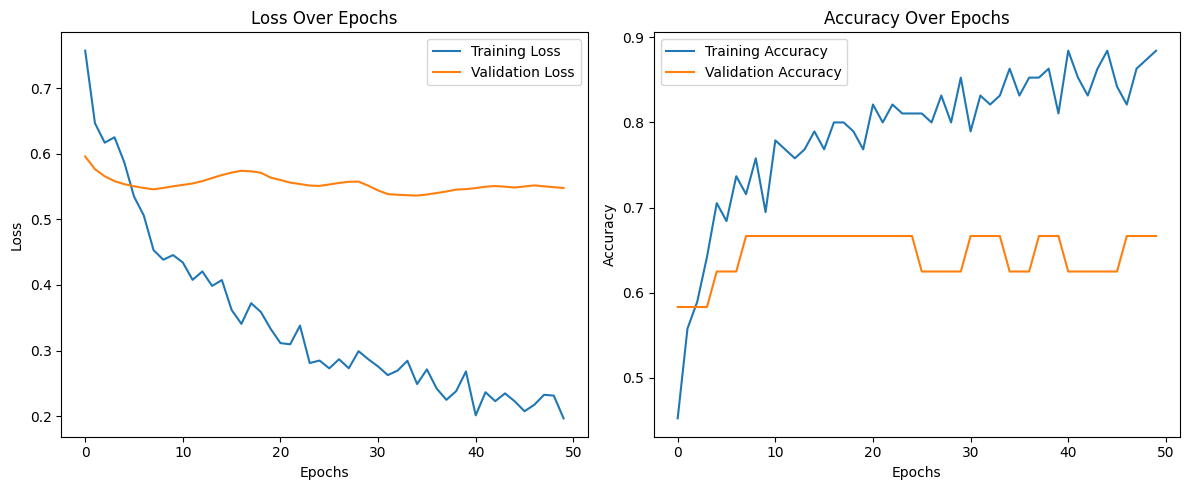

1/1 [==============================] - 0s 31ms/step - loss: 0.4405 - accuracy: 0.7333
Test Loss: 0.4404953718185425, Test Accuracy: 0.7333333492279053
1/1 [==============================] - 0s 102ms/step
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.81      0.85      0.83        20
           2       0.75      0.43      0.55         7

   micro avg       0.81      0.73      0.77        30
   macro avg       0.85      0.65      0.72        30
weighted avg       0.81      0.73      0.76        30
 samples avg       0.72      0.73      0.72        30

Hamming Loss: 0.14444444444444443


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

# Plotting training history
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training and validation history
plot_history(history)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Make predictions
predictions = model.predict(X_test_scaled)

# Since predictions are in probabilities due to the sigmoid activation, we can use a threshold (e.g., 0.5) to convert them to binary outputs
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Evaluate predictions with additional metrics if necessary
from sklearn.metrics import classification_report, hamming_loss

print(classification_report(y_test, binary_predictions))
print("Hamming Loss:", hamming_loss(y_test, binary_predictions))


In [ ]:
# Extract first layer weights
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_importance = np.mean(np.abs(first_layer_weights), axis=1)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': first_layer_importance
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
print(importance_df.head(10))

                                              Feature  Importance
3                 diagnostics_Mask-original_VolumeNum    0.097894
96                            original_ngtdm_Contrast    0.092117
89       original_glszm_SmallAreaLowGrayLevelEmphasis    0.089894
20                    original_firstorder_TotalEnergy    0.087790
1                     diagnostics_Image-original_Mean    0.086979
15                        original_firstorder_Minimum    0.086891
59  original_gldm_SmallDependenceHighGrayLevelEmph...    0.086423
64            original_glrlm_HighGrayLevelRunEmphasis    0.086146
48              original_gldm_DependenceNonUniformity    0.086095
65                     original_glrlm_LongRunEmphasis    0.086022


## Random Forest

It splits the dataset into training and testing subsets, including all one-hot encoded columns as separate target variables.
It trains a Random Forest model for each binary classification task (each cancer type as a separate column).
It uses ROC AUC to evaluate the performance of each binary classifier.
It combines the predicted probabilities from each model to determine the most likely class for each sample.
It calculates the overall accuracy based on these combined predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Performing 10-fold cross-validation
cv_results = cross_validate(rf_model, X, y, cv=10, scoring='accuracy', return_estimator=True)

# Displaying average accuracy
print("Average CV Accuracy:", np.mean(cv_results['test_score']))

# Feature importances from the Random Forest model (from the last fold for simplicity)
feature_importances = cv_results['estimator'][-1].feature_importances_

# Mapping feature names to their importances
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Displaying top 5-10 most important features
print("Top 10 feature importances:")
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance}")


Average CV Accuracy: 0.6752380952380953
Top 10 feature importances:
diagnostics_Mask-original_VolumeNum: 0.06765276120539336
original_shape_MeshVolume: 0.04314645597776961
diagnostics_Mask-original_VoxelNum: 0.039012979154038126
original_shape_SurfaceVolumeRatio: 0.03151498266178445
original_shape_Sphericity: 0.030537754254111923
original_shape_VoxelVolume: 0.02142336332440288
original_glszm_GrayLevelNonUniformity: 0.021108996080852024
original_gldm_DependenceNonUniformity: 0.020875457438262378
original_firstorder_Minimum: 0.020845708858613175
original_glcm_ClusterShade: 0.01941271318485117


1.   diagnostics_Mask-original_VolumeNum: This feature, having the highest importance, represents the number of distinct volumes identified in the diagnostic mask of the image, indicating variability or complexity in the segmented regions which may be crucial for distinguishing between types of brain tumors.
2.   original_shape_SurfaceVolumeRatio: The ratio of surface area to volume in the imaging data, this metric is critical as it reflects the compactness of the tumor, with more irregular shapes often associated with more aggressive tumor types.
3.   original_shape_MeshVolume: This feature measures the total volume of the mesh (3D representation) of the tumor. Larger volumes can indicate more advanced stages of tumor growth or inherently larger tumor types.
4.   diagnostics_Mask-original_VoxelNum: The total number of voxels within the mask of the image, providing a direct measure of tumor size and potentially its growth rate, which are essential factors in medical diagnosis and treatment planning.
5.   original_shape_VoxelVolume: Similar to MeshVolume, this measures the volume covered by the tumor in terms of voxel units, directly impacting the assessment of tumor size and its spatial extent within the brain.
6.   original_ngtdm_Coarseness: A texture descriptor, coarseness quantifies the rate of spatial intensity variation, helping to characterize the texture of the tumor tissue, which can be indicative of different tissue types and tumor grades.
7.   original_shape_MinorAxisLength: This measures the shortest axis of the fitted ellipse (in 3D, ellipsoid) around the tumor. Shorter axes can indicate more rounded tumors, whereas longer ones might suggest elongated growth patterns.
8.   original_gldm_DependenceEntropy: This entropy measure from the Gray Level Dependence Matrix reflects the randomness in the dependence of gray levels within the image. High entropy values suggest more complexity in texture patterns, which might be characteristic of certain tumor types.
9.   original_glrlm_RunEntropy: Another entropy measure, but from the Gray Level Run Length Matrix, this feature captures the randomness in the lengths of consecutive pixel runs of similar intensity, providing insight into the texture's line-like structures and their arrangement.
10.   original_shape_Sphericity: Sphericity indicates how closely the shape of the tumor approaches that of a perfect sphere. Non-spherical shapes are common in malignant tumors due to their irregular growth patterns.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print(f"Average CV Accuracy: {cv_scores.mean()}")

Average CV Accuracy: 0.6280459770114942


In [ ]:
# Getting feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Creating a DataFrame for easier visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df.head(10))  # Print the top 10 features

                                   Feature  Importance
3      diagnostics_Mask-original_VolumeNum    0.076258
110      original_shape_SurfaceVolumeRatio    0.059634
108              original_shape_Sphericity    0.041210
106              original_shape_MeshVolume    0.038155
4       diagnostics_Mask-original_VoxelNum    0.030805
111             original_shape_VoxelVolume    0.023714
94               original_ngtdm_Coarseness    0.019758
100         original_shape_LeastAxisLength    0.019043
15             original_firstorder_Minimum    0.018312
48   original_gldm_DependenceNonUniformity    0.014775


## Decision Tree

Fold 1 Accuracy: 0.5
Fold 2 Accuracy: 0.7666666666666667
Fold 3 Accuracy: 0.5666666666666667
Fold 4 Accuracy: 0.6
Fold 5 Accuracy: 0.5172413793103449


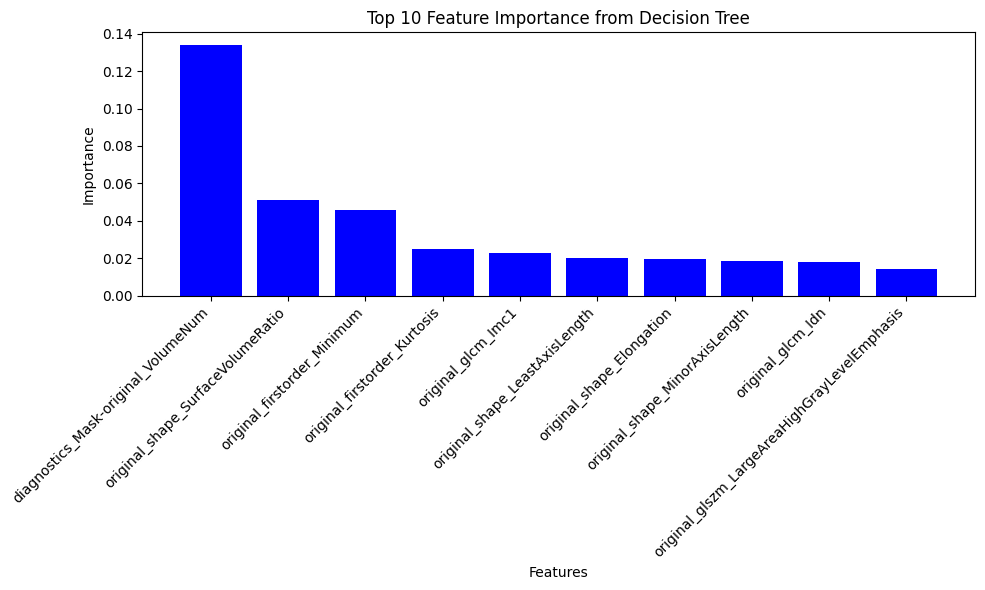

Mean CV Accuracy: 0.5901149425287355
                                           Feature  Importance
3              diagnostics_Mask-original_VolumeNum    0.134024
110              original_shape_SurfaceVolumeRatio    0.050854
15                     original_firstorder_Minimum    0.045821
10                    original_firstorder_Kurtosis    0.024938
36                              original_glcm_Imc1    0.022694
100                 original_shape_LeastAxisLength    0.019837
98                       original_shape_Elongation    0.019370
107                 original_shape_MinorAxisLength    0.018352
35                               original_glcm_Idn    0.017739
82   original_glszm_LargeAreaHighGrayLevelEmphasis    0.014096


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the K-fold cross validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare to collect the feature importance
feature_importances = np.zeros((num_folds, X.shape[1]))

# Loop over each fold
fold_idx = 0
accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize the OneVsRestClassifier with a DecisionTreeClassifier
    ovr_classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
    ovr_classifier.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = ovr_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold_idx+1} Accuracy: {accuracy}")

    # Aggregate feature importance
    for estimator in ovr_classifier.estimators_:
        feature_importances[fold_idx] += estimator.feature_importances_

    fold_idx += 1

# Average the feature importances and accuracies
mean_feature_importances = feature_importances.mean(axis=0) / num_folds
mean_accuracy = np.mean(accuracies)

# Sort and select top 10 features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mean_feature_importances
})
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance from Decision Tree")
plt.bar(top_10_features['Feature'], top_10_features['Importance'], color='b')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

# Print overall mean accuracy and top 10 features
print(f"Mean CV Accuracy: {mean_accuracy}")
print(top_10_features)

### Applying GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

# Define the model
tree = DecisionTreeClassifier(random_state=42)
ovr = OneVsRestClassifier(tree)

# Define the parameter grid
param_grid = {
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 10, 20],
    'estimator__min_samples_leaf': [1, 5, 10]
}

# Setup the grid search
grid_search = GridSearchCV(ovr, param_grid, cv=5, scoring='accuracy')

# Fit grid search
best_model = grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters:", best_model.best_params_)
print("Best score:", best_model.best_score_)


Best parameters: {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 20}
Best score: 0.6085057471264368


### RandomizedGridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import randint

# Define the model
tree = DecisionTreeClassifier(random_state=42)
ovr = OneVsRestClassifier(tree)

# Define the parameter distribution
param_dist = {
    'estimator__max_depth': [10, 20, 30, None],  # None means unlimited depth
    'estimator__min_samples_split': randint(2, 20),  # Random integers between 2 and 20
    'estimator__min_samples_leaf': randint(1, 10)   # Random integers between 1 and 10
}

# Setup the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=ovr,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    verbose=1,   # Controls the verbosity: the higher, the more messages
    random_state=42,
    n_jobs=-1    # Number of jobs to run in parallel (-1 means using all processors)
)

# Fit randomized search
best_model = random_search.fit(X, y)

# Output the best parameters and the best score
print("Best parameters:", best_model.best_params_)
print("Best score:", best_model.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'estimator__max_depth': 20, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 11}
Best score: 0.6218390804597702


# Gender Identification

## XGBoost

In [ ]:
# Creating the feature matrix X
# Dropping non-numeric columns
X = df_encoded.select_dtypes(include=['int64', 'float64'])

# Defining the specific disease type columns for the target variable y
disease_columns = ['Disease_Type_Astrocytoma', 'Disease_Type_GBM', 'Disease_Type_Oligodendroglioma']

# Creating the target matrix y using the specified columns
y = df_encoded[disease_columns]

KeyError: "None of [Index(['Disease_Type_Astrocytoma', 'Disease_Type_GBM',\n       'Disease_Type_Oligodendroglioma'],\n      dtype='object')] are in the [columns]"

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## OneVsRestClassifier in conjunction with XGBoost

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the OneVsRestClassifier with an XGBClassifier
ovr_classifier = OneVsRestClassifier(XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
ovr_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = ovr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the OneVsRest XGBoost model:", accuracy)



In [ ]:
# Assuming df_encoded is your DataFrame

# Display basic statistics of the 'Gender' column
gender_counts = df_encoded['Gender'].value_counts()
print("Gender distribution in the dataset:\n", gender_counts)

# Analyze the relationship between Gender and each type of cancer
for disease in y.columns:
    cross_tab = pd.crosstab(df_encoded['Gender'], df_encoded[disease])
    print(f"\nRelationship between Gender and {disease}:\n", cross_tab)


In [ ]:
from scipy.stats import chi2_contingency

# Perform Chi-squared test for independence between Gender and each type of cancer
for disease in y.columns:
    cross_tab = pd.crosstab(df_encoded['Gender'], df_encoded[disease])
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    print(f"\nChi-squared test results for Gender and {disease}:")
    print(f"Chi-squared Statistic: {chi2}, p-value: {p}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of cancer types by Gender
for disease in y.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=disease, hue='Gender', data=df_encoded)
    plt.title(f'Distribution of {disease} by Gender')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale the features (Random Forest does not require feature scaling but doing so can be beneficial in some scenarios)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)))



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

# Optional: Scaling the features (Random Forest does not require feature scaling but doing so can be beneficial in some scenarios)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Setup K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and capture the scores
cv_scores = cross_val_score(rf, X_scaled, y, cv=kf, scoring='accuracy')

# Print the results
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Optional: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
top_10_features = features_df.sort_values(by='Importance', ascending=False).head(10)

# Display top 10 important features
print(top_10_features)
